# **Breast Cancer Classification using SVM**

## **Import necessary modules**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path=r"/content/drive/My Drive/breast_cancer"

Mounted at /content/drive


In [ ]:
dpath = os.listdir(path)
dirname =[]
for i in range(0,len(dpath)):
  dirname.append(path + '/' + dpath[i])
df=pd.read_csv(dirname[0])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## **Exploratory Data analysis and preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop(['id','Unnamed: 32'], inplace=True ,axis=1)
df.rename(columns= {"diagnosis":"target"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


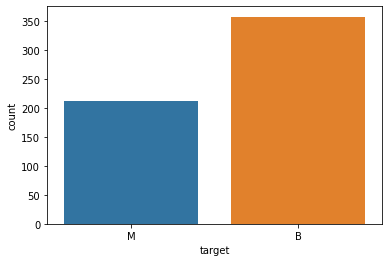

In [ ]:
import matplotlib.pyplot as plt

sns.countplot(df["target"])
plt.show()

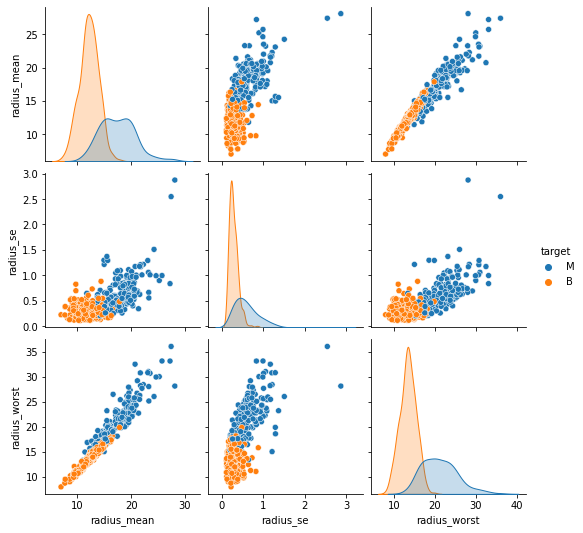

In [ ]:
radius = df[['radius_mean','radius_se','radius_worst','target']]
sns.pairplot(radius, hue='target')

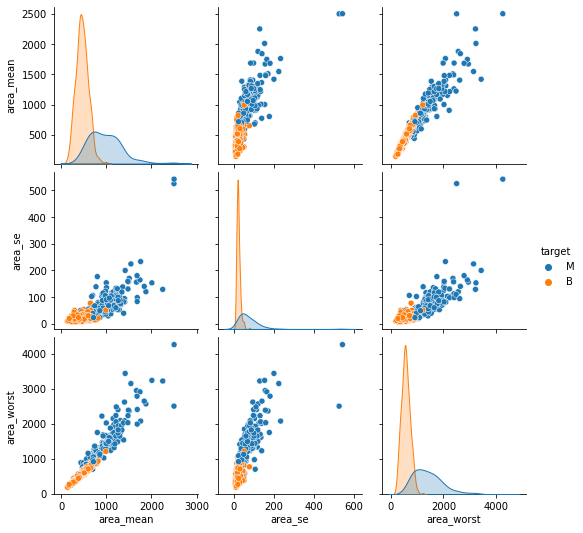

In [ ]:
area = df[['area_mean','area_se','area_worst','target']]
sns.pairplot(area, hue='target')

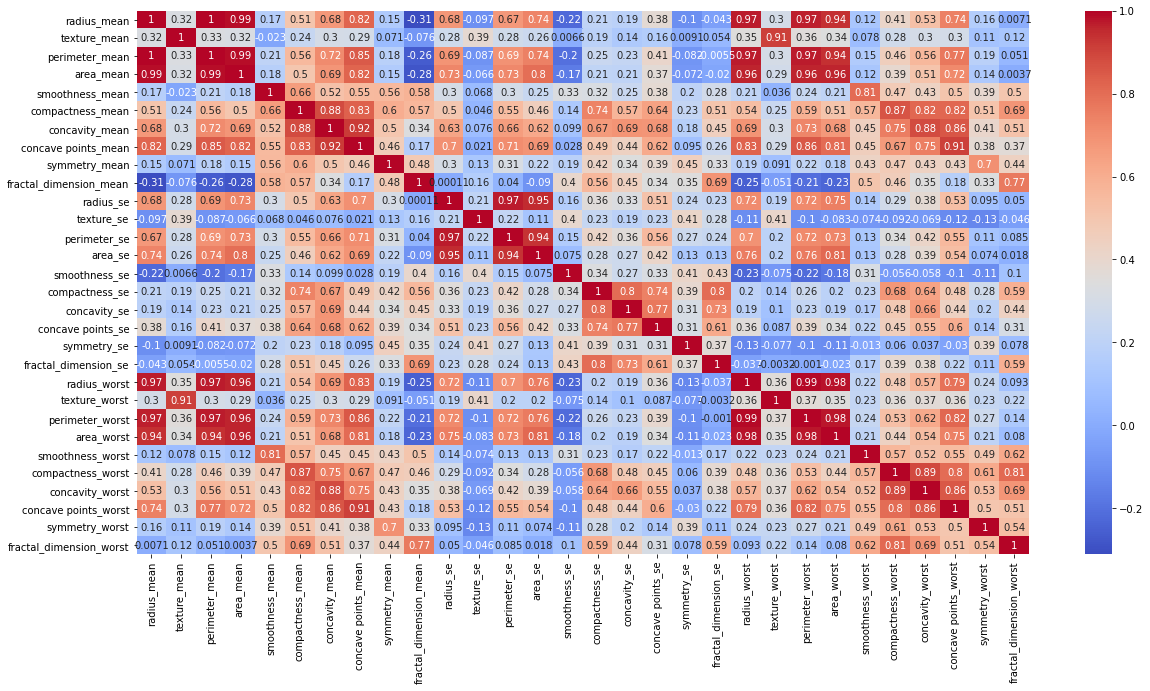

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

In [ ]:
df["target"]= [1 if i== "M" else 0 for i in df["target"]]

In [ ]:
y=df.target
x=df.drop(["target"], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1=sc.fit_transform(x)
x1

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x1,y, test_size=0.2,random_state=42)

## **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_train=svm_model.predict(x_train)
y_pred=svm_model.predict(x_test)
scor=accuracy_score(y_test,y_pred)
scr=accuracy_score(y_train,y_pred_train)
print("Train Accuracy",scr*100,'%')
print("Test Accuracy",scor*100,'%')

Train Accuracy 98.68131868131869 %
Test Accuracy 97.36842105263158 %


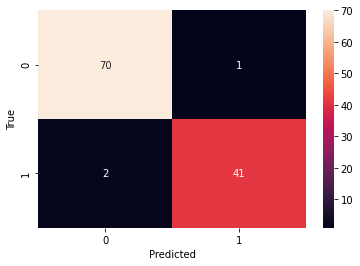

In [ ]:
cm=confusion_matrix(y_test, y_pred,labels=[0,1])
hm=sns.heatmap(cm,  annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## **Optimization using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.01,0.1, 1],  
              'gamma': ['auto','scale'], 
              'max_iter': [100],
              'kernel': ['rbf']}  

grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3,return_train_score=True) 
  
est=grid.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.01, gamma=auto, kernel=rbf, max_iter=100 ....................
[CV]  C=0.01, gamma=auto, kernel=rbf, max_iter=100, score=(train=0.948, test=0.912), total=   0.0s
[CV] C=0.01, gamma=auto, kernel=rbf, max_iter=100 ....................
[CV]  C=0.01, gamma=auto, kernel=rbf, max_iter=100, score=(train=0.942, test=0.967), total=   0.0s
[CV] C=0.01, gamma=auto, kernel=rbf, max_iter=100 ....................
[CV]  C=0.01, gamma=auto, kernel=rbf, max_iter=100, score=(train=0.931, test=0.923), total=   0.0s
[CV] C=0.01, gamma=auto, kernel=rbf, max_iter=100 ....................
[CV]  C=0.01, gamma=auto, kernel=rbf, max_iter=100, score=(train=0.951, test=0.934), total=   0.0s
[CV] C=0.01, gamma=auto, kernel=rbf, max_iter=100 ....................
[CV]  C=0.01, gamma=auto, kernel=rbf, max_iter=100, score=(train=0.953, test=0.934), total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf, max_iter=100 ...................
[CV]  C=0.01, gamma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/

[CV]  C=0.01, gamma=scale, kernel=rbf, max_iter=100, score=(train=0.948, test=0.967), total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf, max_iter=100 ...................
[CV]  C=0.01, gamma=scale, kernel=rbf, max_iter=100, score=(train=0.931, test=0.934), total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf, max_iter=100 ...................
[CV]  C=0.01, gamma=scale, kernel=rbf, max_iter=100, score=(train=0.953, test=0.945), total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf, max_iter=100 ...................
[CV]  C=0.01, gamma=scale, kernel=rbf, max_iter=100, score=(train=0.951, test=0.934), total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf, max_iter=100 .....................
[CV]  C=0.1, gamma=auto, kernel=rbf, max_iter=100, score=(train=0.962, test=0.923), total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf, max_iter=100 .....................
[CV]  C=0.1, gamma=auto, kernel=rbf, max_iter=100, score=(train=0.953, test=0.934), total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf, max_iter=100 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=0.1, gamma=auto, kernel=rbf, max_iter=100, score=(train=0.962, test=0.934), total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, max_iter=100 ....................
[CV]  C=0.1, gamma=scale, kernel=rbf, max_iter=100, score=(train=0.962, test=0.923), total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, max_iter=100 ....................
[CV]  C=0.1, gamma=scale, kernel=rbf, max_iter=100, score=(train=0.953, test=0.934), total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, max_iter=100 ....................
[CV]  C=0.1, gamma=scale, kernel=rbf, max_iter=100, score=(train=0.940, test=0.978), total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, max_iter=100 ....................
[CV]  C=0.1, gamma=scale, kernel=rbf, max_iter=100, score=(train=0.953, test=0.956), total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, max_iter=100 ....................
[CV]  C=0.1, gamma=scale, kernel=rbf, max_iter=100, score=(train=0.962, test=0.934), total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf, max_iter=100 .....

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

In [ ]:
print(grid.best_params_) 
print(grid.best_estimator_)

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 100}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=100, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
pred_train=grid.predict(x_train)
pred=grid.predict(x_test)
scor=accuracy_score(y_test,pred)
scr=accuracy_score(y_train,pred_train)
print("Train Accuracy",scr*100,'%')
print("Test Accuracy",scor*100,'%')

Train Accuracy 98.9010989010989 %
Test Accuracy 98.24561403508771 %


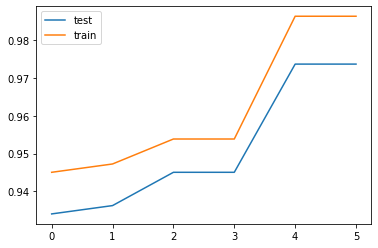

In [ ]:
test_scores = est.cv_results_['mean_test_score']
train_scores = est.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()


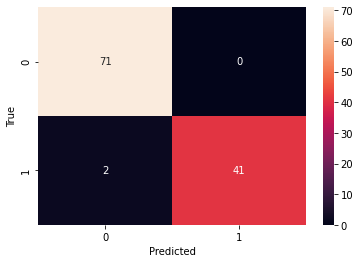

In [ ]:
cn=confusion_matrix(y_test, pred,labels=[0,1])
hn=sns.heatmap(cn,  annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
pred_proba=grid.predict_proba(x_test)[:,1]

ROC-AUC score: 0.997


Text(0, 0.5, 'True Positive Rate')

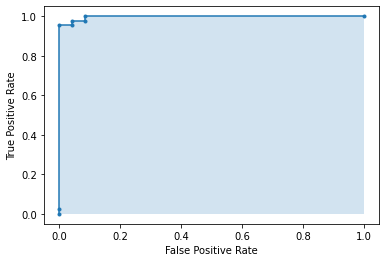

In [ ]:
fpr, tpr, threshold = roc_curve(y_test,pred_proba)
ar=auc(fpr,tpr)
print("ROC-AUC score: %.3f"%ar)
plt.plot(fpr, tpr,marker='.')
plt.fill_between(fpr,tpr,alpha=0.20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')